In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils import data

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torchvision
import os

# from lxml import etree                            
import glob

from PIL import Image

In [3]:
names = {'0': 'background', '1': 'person', '2': 'bicycle', '3': 'car', '4': 'motorcycle', '5': 'airplane', '6': 'bus', '7': 'train', '8': 'truck', '9': 'boat', '10': 'traffic light', '11': 'fire hydrant', '13': 'stop sign', '14': 'parking meter', '15': 'bench', '16': 'bird', '17': 'cat', '18': 'dog', '19': 'horse', '20': 'sheep', '21': 'cow', '22': 'elephant', '23': 'bear', '24': 'zebra', '25': 'giraffe', '27': 'backpack', '28': 'umbrella', '31': 'handbag', '32': 'tie', '33': 'suitcase', '34': 'frisbee', '35': 'skis', '36': 'snowboard', '37': 'sports ball', '38': 'kite', '39': 'baseball bat', '40': 'baseball glove', '41': 'skateboard', '42': 'surfboard', '43': 'tennis racket', '44': 'bottle', '46': 'wine glass', '47': 'cup', '48': 'fork', '49': 'knife', '50': 'spoon', '51': 'bowl', '52': 'banana', '53': 'apple', '54': 'sandwich', '55': 'orange', '56': 'broccoli', '57': 'carrot', '58': 'hot dog', '59': 'pizza', '60': 'donut', '61': 'cake', '62': 'chair', '63': 'couch', '64': 'potted plant', '65': 'bed', '67': 'dining table', '70': 'toilet', '72': 'tv', '73': 'laptop', '74': 'mouse', '75': 'remote', '76': 'keyboard', '77': 'cell phone', '78': 'microwave', '79': 'oven', '80': 'toaster', '81': 'sink', '82': 'refrigerator', '84': 'book', '85': 'clock', '86': 'vase', '87': 'scissors', '88': 'teddybear', '89': 'hair drier', '90': 'toothbrush'}

In [3]:
names

{'0': 'background',
 '1': 'person',
 '2': 'bicycle',
 '3': 'car',
 '4': 'motorcycle',
 '5': 'airplane',
 '6': 'bus',
 '7': 'train',
 '8': 'truck',
 '9': 'boat',
 '10': 'traffic light',
 '11': 'fire hydrant',
 '13': 'stop sign',
 '14': 'parking meter',
 '15': 'bench',
 '16': 'bird',
 '17': 'cat',
 '18': 'dog',
 '19': 'horse',
 '20': 'sheep',
 '21': 'cow',
 '22': 'elephant',
 '23': 'bear',
 '24': 'zebra',
 '25': 'giraffe',
 '27': 'backpack',
 '28': 'umbrella',
 '31': 'handbag',
 '32': 'tie',
 '33': 'suitcase',
 '34': 'frisbee',
 '35': 'skis',
 '36': 'snowboard',
 '37': 'sports ball',
 '38': 'kite',
 '39': 'baseball bat',
 '40': 'baseball glove',
 '41': 'skateboard',
 '42': 'surfboard',
 '43': 'tennis racket',
 '44': 'bottle',
 '46': 'wine glass',
 '47': 'cup',
 '48': 'fork',
 '49': 'knife',
 '50': 'spoon',
 '51': 'bowl',
 '52': 'banana',
 '53': 'apple',
 '54': 'sandwich',
 '55': 'orange',
 '56': 'broccoli',
 '57': 'carrot',
 '58': 'hot dog',
 '59': 'pizza',
 '60': 'donut',
 '61': 'cake',

In [4]:
BATCH_SIZE = 16

单张图片的读取和预测演示：

In [5]:
pil_img = Image.open(r'./test/car-and-bus.jpg')

In [6]:
np_img = np.array(pil_img)

In [7]:
np_img.shape

(480, 800, 3)

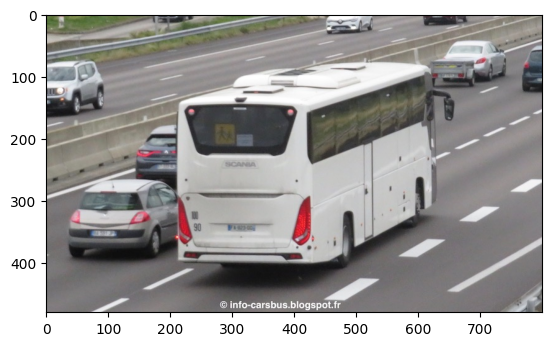

In [8]:
plt.imshow(np_img)
plt.show()

In [9]:
tensor_img = torch.from_numpy(np_img/255).permute(2, 0, 1).type(torch.float32)

加载模型

In [26]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
# model = torchvision.models.detection.ssdlite320_mobilenet_v3_large(pretrained=True)
model.eval()

c:\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSDLite320_MobileNet_V3_Large_Weights.COCO_V1`. You can also use `weights=SSDLite320_MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssdlite320_mobilenet_v3_large_coco-a79551df.pth" to C:\Users\victor/.cache\torch\hub\checkpoints\ssdlite320_mobilenet_v3_large_coco-a79551df.pth
100%|██████████| 13.4M/13.4M [00:06<00:00, 2.05MB/s]


SSD(
  (backbone): SSDLiteFeatureExtractorMobileNet(
    (features): Sequential(
      (0): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (2): Hardswish()
        )
        (1): InvertedResidual(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
              (1): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (2): ReLU(inplace=True)
            )
            (1): Conv2dNormActivation(
              (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (1): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
            )
          )
        )
        (2): Invert

In [27]:
pred = model([tensor_img])

In [28]:
pred

[{'boxes': tensor([[ 30.6355, 267.7600, 221.6689, 395.7200],
          [212.2298,  66.5346, 632.5593, 417.1718],
          [  0.0000,  68.5436,  99.5832, 164.9103],
          ...,
          [189.8796, 116.6914, 372.1901, 197.9663],
          [453.4099, 289.0297, 487.1545, 340.4160],
          [167.6139,  71.2928, 265.7415, 168.7025]], grad_fn=<StackBackward0>),
  'scores': tensor([0.9974, 0.9903, 0.7254, 0.6278, 0.2226, 0.1260, 0.1226, 0.1184, 0.1086,
          0.1054, 0.1003, 0.0846, 0.0783, 0.0767, 0.0745, 0.0745, 0.0671, 0.0570,
          0.0561, 0.0547, 0.0546, 0.0534, 0.0489, 0.0488, 0.0486, 0.0474, 0.0467,
          0.0465, 0.0464, 0.0464, 0.0460, 0.0456, 0.0437, 0.0430, 0.0420, 0.0420,
          0.0418, 0.0417, 0.0415, 0.0413, 0.0410, 0.0409, 0.0408, 0.0403, 0.0395,
          0.0393, 0.0393, 0.0392, 0.0392, 0.0387, 0.0385, 0.0382, 0.0378, 0.0378,
          0.0377, 0.0377, 0.0376, 0.0375, 0.0375, 0.0370, 0.0368, 0.0368, 0.0366,
          0.0363, 0.0363, 0.0361, 0.0361, 0.0356, 0.

In [29]:
boxes = pred[0]['boxes']
labels = pred[0]['labels']
scores = pred[0]['scores']

In [30]:
threshold = 0.5

In [31]:
pred_index = scores > threshold

In [32]:
pred_index

tensor([ True,  True,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, 

In [33]:
boxes = boxes[pred_index]

In [34]:
boxes

tensor([[ 30.6355, 267.7600, 221.6689, 395.7200],
        [212.2298,  66.5346, 632.5593, 417.1718],
        [  0.0000,  68.5436,  99.5832, 164.9103],
        [622.1442,  44.7604, 738.5468, 113.2163]], grad_fn=<IndexBackward0>)

In [35]:
labels = labels[pred_index]

In [36]:
labels = [names.get(str(idx.item())) for idx in labels]

In [21]:
labels

['car', 'car', 'car', 'car', 'car', 'bus', 'car', 'car', 'car', 'car']

In [37]:
img = torch.from_numpy(np_img).permute(2, 0, 1)

In [38]:
img.shape

torch.Size([3, 480, 800])

In [39]:
result = torchvision.utils.draw_bounding_boxes(
                        img,
                        boxes,
                        labels)

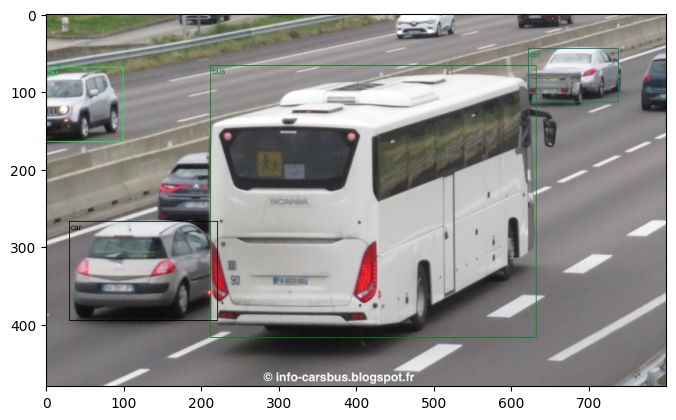

In [40]:
plt.figure(figsize=(8, 10))
plt.imshow(result.permute(1,2,0).numpy())
plt.savefig('2007_000027.jpg', dpi=300)

多张图片的预测

In [28]:
# model 、name 、threshold已经定义

In [27]:
images_path = glob.glob(r'VOC2012\JPEGImages\*.jpg')

In [60]:
if not os.path.isdir('my_voc_pred'):
    os.mkdir('my_voc_pred')
colors = ['blue', 'yellow', 'red', 'purple']*5

In [61]:
for img_path in images_path:
    img_name = img_path.split('JPEGImages')[-1].strip('\\')
    pil_img = Image.open(img_path)
    pil_img = np.array(pil_img)
    tensor_img = torch.from_numpy(pil_img/255).permute(2, 0, 1).type(torch.float32)
    pred = model([tensor_img])
    boxes = pred[0]['boxes']
    labels = pred[0]['labels']
    scores = pred[0]['scores']
    pred_index = scores > threshold
    boxes = boxes[pred_index]
    labels = labels[pred_index]
    labels = [names.get(str(idx.item())) for idx in labels]
    pil_img = torch.from_numpy(pil_img).permute(2, 0, 1)
    pil_img = torchvision.utils.draw_bounding_boxes(pil_img, boxes, labels, 
                                                    colors=colors,
                                                    width=3)
    pil_img = Image.fromarray(pil_img.permute(1,2,0).numpy())
    pil_img.save(os.path.join('my_voc_pred', img_name))
    print('saved Image ', img_name, 'to the folder my_voc_pred')

saved Image  2007_000027.jpg to the folder my_voc_pred
saved Image  2007_000032.jpg to the folder my_voc_pred
saved Image  2007_000033.jpg to the folder my_voc_pred
saved Image  2007_000039.jpg to the folder my_voc_pred
saved Image  2007_000042.jpg to the folder my_voc_pred
saved Image  2007_000061.jpg to the folder my_voc_pred
saved Image  2007_000063.jpg to the folder my_voc_pred
saved Image  2007_000068.jpg to the folder my_voc_pred
saved Image  2007_000121.jpg to the folder my_voc_pred
saved Image  2007_000123.jpg to the folder my_voc_pred
saved Image  2007_000129.jpg to the folder my_voc_pred
saved Image  2007_000170.jpg to the folder my_voc_pred
saved Image  2007_000175.jpg to the folder my_voc_pred
saved Image  2007_000187.jpg to the folder my_voc_pred
saved Image  2007_000241.jpg to the folder my_voc_pred
saved Image  2007_000243.jpg to the folder my_voc_pred
saved Image  2007_000250.jpg to the folder my_voc_pred
saved Image  2007_000256.jpg to the folder my_voc_pred
saved Imag

KeyboardInterrupt: 